In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train_data = pd.read_csv('trainingData.csv')
val_data = pd.read_csv('validationData.csv')

In [12]:
train_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [13]:
train_data.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [14]:
#creating a new column for floor and building combined
train_data['FLOOR_BUILDING']=train_data['FLOOR'].astype(str) + train_data['BUILDINGID'].astype(str)
val_data['FLOOR_BUILDING']=val_data['FLOOR'].astype(str) + val_data['BUILDINGID'].astype(str)
train_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,FLOOR_BUILDING
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,21
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,21
2,100,100,100,100,100,100,100,-97,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,21
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,21
4,100,100,100,100,100,100,100,100,100,100,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,00


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 530 entries, WAP001 to FLOOR_BUILDING
dtypes: float64(2), int64(527), object(1)
memory usage: 80.6+ MB


In [16]:
print(train_data.columns)

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'FLOOR_BUILDING'],
      dtype='object', length=530)


In [17]:
train_data.iloc[:,0:520].min().min()  #min WAP value

-104

In [18]:
train_data.loc[train_data["BUILDINGID"] == 0]["FLOOR"].unique()

array([0, 2, 1, 3], dtype=int64)

In [19]:
train_data.loc[train_data["BUILDINGID"] == 1]["FLOOR"].unique()

array([2, 0, 1, 3], dtype=int64)

In [20]:
train_data.loc[train_data["BUILDINGID"] == 2]["FLOOR"].unique()

array([3, 2, 4, 1, 0], dtype=int64)

In [21]:
#building 0 and 1 has four floors, building 2 has five floors

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_data, test_size=0.4,stratify=train_data[['FLOOR_BUILDING']])
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

## Data Preprocessing

In [23]:
def data_pp(df):
    df = df.drop(['SPACEID','RELATIVEPOSITION','USERID', 'PHONEID', 'TIMESTAMP', 'FLOOR_BUILDING'], axis = 1)
    X_df, Y_df = df.drop(['FLOOR', 'BUILDINGID','LONGITUDE', 'LATITUDE'], axis = 1), df[['FLOOR','BUILDINGID']]
    return X_df, Y_df

#training the dataset
train_X, train_Y = data_pp(train)

## Executing different Models

In [24]:
#importing the models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier, DMatrix

In [25]:
#function for training the dataset using 3 different models
def train_model(train_X,train_Y):
    model1 = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=10)).fit(train_X,train_Y)
    model2 = MultiOutputClassifier(RandomForestClassifier()).fit(train_X,train_Y)
    model3 = MultiOutputClassifier(XGBClassifier(n_estimators=500)).fit(train_X,train_Y)
    return [model1, model2, model3]
models = train_model(train_X, train_Y)

In [26]:
def metrics(val_data, models, data=None):
    val_X, val_Y = data_pp(val_data)
    yhat_val1 = models[0].predict(val_X)
    yhat_val2 = models[1].predict(val_X)
    yhat_val3 = models[2].predict(val_X)
    
    if data:
        print('{}'.format(data))
        
    for i in range(len(models)):
        yhat_val = models[i].predict(val_X)
        print(models[i].get_params()['estimator'])
        
        if data == 'Validation':
            print('MSE for model{} is '.format(i+1), mean_squared_error(yhat_val, val_Y))
        print('{} Accuracy of model{} for column FLOOR: {} BUILDINGID: {}'.format(data,i+1,accuracy_score(yhat_val[:,0],val_Y.values[:,0]),accuracy_score(yhat_val[:,1],val_Y.values[:,1])))

In [27]:
metrics(val_data, models, 'Validation')
metrics(test, models, 'Test')

Validation
KNeighborsClassifier(n_neighbors=10)
MSE for model1 is  0.2533753375337534
Validation Accuracy of model1 for column FLOOR: 0.7083708370837084 BUILDINGID: 0.9873987398739874
RandomForestClassifier()
MSE for model2 is  0.08640864086408641
Validation Accuracy of model2 for column FLOOR: 0.8667866786678667 BUILDINGID: 0.9972997299729973
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, 

## Running the model with different sizes of train data (20%, 40%, 60%, 80%, 100%)

In [28]:
def pre_process(df, frac=1):
    df = df.drop(['USERID', 'PHONEID', 'TIMESTAMP', 'FLOOR_BUILDING'], axis = 1)
    df = df.sample(frac = frac)
    X_df, Y_df = df.drop(['FLOOR', 'BUILDINGID','LONGITUDE', 'LATITUDE'], axis = 1), df[['FLOOR','BUILDINGID']]
    return X_df, Y_df

#### Test data = 20% of train data

In [46]:
X_train_20, Y_train_20 = pre_process(train, frac =0.2)
model1, model2, model3 = train_model(X_train_20, Y_train_20)
test_X, test_Y = pre_process(test)
yhat20_test1 = model1.predict(test_X)
yhat20_test2 = model2.predict(test_X)
yhat20_test3 = model3.predict(test_X)

#accuracy scores of the 3 models
for i in range(2):
    knn_acc1 = (accuracy_score(yhat20_test1[:,i],test_Y.values[:,i]))
    rfc_acc1 = (accuracy_score(yhat20_test2[:,i],test_Y.values[:,i]))
    xgb_acc1 = (accuracy_score(yhat20_test3[:,i],test_Y.values[:,i]))
    
print('\nKNN: ', knn_acc1*100)
print('RFC: ', rfc_acc1*100)
print('XGB: ', xgb_acc1*100)    


KNN:  99.05956112852664
RFC:  99.94984326018809
XGB:  99.69905956112852


#### Test data = 40% of train data

In [47]:
X_train_40, Y_train_40 = pre_process(train, frac =0.4)
model1, model2, model3 = train_model(X_train_40, Y_train_40)
test_X, test_Y = pre_process(test)
yhat40_test1 = model1.predict(test_X)
yhat40_test2 = model2.predict(test_X)
yhat40_test3 = model3.predict(test_X)

#accuracy scores of the 3 models
for i in range(2):
    knn_acc2 = (accuracy_score(yhat40_test1[:,i],test_Y.values[:,i]))
    rfc_acc2 = accuracy_score(yhat40_test2[:,i],test_Y.values[:,i])
    xgb_acc2 = accuracy_score(yhat40_test3[:,i],test_Y.values[:,i])

print('\nKNN: ', knn_acc2*100)
print('RFC: ', rfc_acc2*100)
print('XGB: ', xgb_acc2*100)


KNN:  99.49843260188088
RFC:  99.96238244514106
XGB:  99.86206896551724


#### Test data = 60% of train data

In [48]:
X_train_60, Y_train_60 = pre_process(train, frac =0.6)
model1, model2, model3 = train_model(X_train_60, Y_train_60)
test_X, test_Y = pre_process(test)
yhat60_test1 = model1.predict(test_X)
yhat60_test2 = model2.predict(test_X)
yhat60_test3 = model3.predict(test_X)

#accuracy scores of the 3 models
for i in range(2):
    knn_acc3 = (accuracy_score(yhat60_test1[:,i],test_Y.values[:,i]))
    rfc_acc3 = accuracy_score(yhat60_test2[:,i],test_Y.values[:,i])
    xgb_acc3 = accuracy_score(yhat60_test3[:,i],test_Y.values[:,i])

print('\nKNN: ', knn_acc3*100)
print('RFC: ', rfc_acc3*100)
print('XGB: ', xgb_acc3*100)


KNN:  99.78683385579937
RFC:  99.92476489028213
XGB:  99.89968652037618


#### Test data = 80% of train data

In [50]:
X_train_80, Y_train_80 = pre_process(train, frac =0.8)
model1, model2, model3 = train_model(X_train_80, Y_train_80)
test_X, test_Y = pre_process(test)
yhat80_test1 = model1.predict(test_X)
yhat80_test2 = model2.predict(test_X)
yhat80_test3 = model3.predict(test_X)

#accuracy scores of the 3 models
for i in range(2):
    knn_acc4 = (accuracy_score(yhat80_test1[:,i],test_Y.values[:,i]))
    rfc_acc4 = accuracy_score(yhat80_test2[:,i],test_Y.values[:,i])
    xgb_acc4 = accuracy_score(yhat80_test3[:,i],test_Y.values[:,i])

print('\nKNN: ', knn_acc4*100)
print('RFC: ', rfc_acc4*100)
print('XGB: ', xgb_acc4*100)


KNN:  99.76175548589342
RFC:  99.96238244514106
XGB:  99.93730407523512


#### Test data = 100% of train data

In [51]:
X_train_100, Y_train_100 = pre_process(train, frac = 1.0)
model1, model2, model3 = train_model(X_train_100, Y_train_100)
test_X, test_Y = pre_process(test)
yhat100_test1 = model1.predict(test_X)
yhat100_test2 = model2.predict(test_X)
yhat100_test3 = model3.predict(test_X)

#accuracy scores of the 3 models
for i in range(2):
    knn_acc5 = (accuracy_score(yhat100_test1[:,i],test_Y.values[:,i]))
    rfc_acc5 = accuracy_score(yhat100_test2[:,i],test_Y.values[:,i])
    xgb_acc5 = accuracy_score(yhat100_test3[:,i],test_Y.values[:,i])

print('\nKNN: ', knn_acc5*100)
print('RFC: ', rfc_acc5*100)
print('XGB: ', xgb_acc5*100)


KNN:  99.81191222570533
RFC:  99.97492163009404
XGB:  99.94984326018809


In [53]:
#calculating the average of knn, rfc and xgb for all five test data

knn_avg = (knn_acc1 + knn_acc2 + knn_acc3 + knn_acc4 + knn_acc5)/.05
rfc_avg = (rfc_acc1 + rfc_acc2 + rfc_acc3 + rfc_acc4 + rfc_acc5)/.05 
xgb_avg = (xgb_acc1 + xgb_acc2 + xgb_acc3 + xgb_acc4 + xgb_acc5)/.05

print(knn_avg)
print(rfc_avg)
print(xgb_avg)

99.58369905956113
99.95485893416927
99.86959247648902


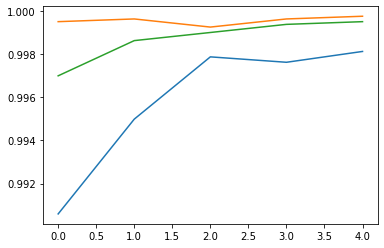

In [62]:
knn_acc = [knn_acc1, knn_acc2, knn_acc3, knn_acc4, knn_acc5]
rfc_acc = [rfc_acc1, rfc_acc2, rfc_acc3, rfc_acc4, rfc_acc5]
xgb_acc = [xgb_acc1, xgb_acc2, xgb_acc3, xgb_acc4, xgb_acc5]

plt.plot(knn_acc)
plt.plot(rfc_acc)
plt.plot(xgb_acc)